In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [144]:
visualizations_dir = Path('visualizations')

In [313]:
results_df = pd.read_csv('survey_results.csv')

In [314]:
results_df.rename(columns={'Enter a nickname of your choice to uniquely identify your answers. If you participated in a previous ML4SE study, please use the same nickname (any random combination of letters and numbers that you can easily remember). \n\nPlease write it down on a separate piece of paper for your future use. \n\nThis will be used in future ML4SE surveys to save you time from filling the demographics and taking the programming test task again.': 'nickname'}, inplace=True)

In [147]:
results_df.head()

,Zeitstempel,"Study Information Sheet for the ML4SE study \nYou are being asked to participate in a research study to perform tasks related to software design, coding, debugging and testing.\nThese tasks will be performed either online. However, dear participant, in order that the results are unbiased, please do not search the web or use ChatGPT while producing your answers. \nThe purpose of the study is to identify the challenges developers face using tools while trying to answer their questions about the code. That knowledge can inform the design of new tools to help developers to work more effectively.\nYou are eligible to participate in this study if you are at least 18 years of age or older and are fluent in English.\nThe research procedures involve answering questions about software programming and will last approximately from 15 to 25 minutes.\nThere are no risks or discomfort associated with the study. \nNo personal information will be collected.\nThere are no direct benefits from participation in the study. However, this study may help us to better understand how programmers work with tools.\nAll research data collected will be stored securely and confidentially in encrypted files.\nThe research team and authorized personnel may have access to your study records to protect your safety and welfare. Any information derived from this research project that personally identifies you will not be voluntarily released or disclosed by these entities without your separate consent, except as specifically required by law.\nIf you have any comments, concerns, or questions regarding the conduct of this research please contact the researchers listed at the top of this form.\nParticipation in this study is voluntary. There is no cost to you for participating. You may refuse to participate or discontinue your involvement at any time without penalty. You are free to withdraw from this study at any time. If you decide to withdraw from this study you please notify the research team immediately. \nConsent\nIf you agree to participate in this study, please answer with ""Yes, I agree"". If you do not wish to participate in the study, please answer ""No, thanks"".",nickname,Did you previously participate in another ML4SE survey?,Which of these activities are part of your daily software engineering work?,What is your current main professional activity?,How experienced are you in the Java programming language?,Mark the years of experience in the languages below [Java],Mark the years of experience in the languages below [Python],Mark the years of experience in the languages below [SQL],...,"Would you have preferred a different prompt(s) in the 2nd scenario? If so, which?","Code\nsee picture below.\n\nUnit Test:\n assertPrint(""var x = -0.0;"", ""var x=-0.0"");\n\nFailure:\n junit.framework.ComparisonFailure: expected:<var x=[-0.]0> but was:<var x=[ ]0>\n\nQuestion:\nIs there any issue with the use or the definition of variable ""x"" in the source code that might be related to the failure?\n\nExplain the root cause of the failure.","AI Prompt: ""Explain the root cause of the failure.""\nAI Response: ChatGPT answer\n\nWhat is your choice?",Explain your choice.,"On a scale of 1 to 5, how would you rate your explanation in the 3rd scenario?",Please describe how would you resolve the bug(s) in the code of the 3rd scenario.,Rate your confidence in your solution from 1 to 5..2,Rate the task's difficulty on a scale of 1 to 5..2,"Would you have preferred a different prompt in the 3rd scenario? If so, which?",Do you have any general feedback on the study?
0,2024/04/18 11:15:57 AM OEZ,"Yes, I accept to participate in the study.",AL123,"No, this is my first ML4SE study.",Training and Testing machine learning models;D...,Student - Master program,3,Between Three and Six Years,More than Six Years,Between One and Three Years,...,They were okay.,"I don't know. Based on the error message, it p...",discard your response and adopt the AI response,AI response is mu

# Programming Test Evaluation

In [213]:
programming_test_columns = [
    'What is the output of the code above?',
    'What would have been the output if we had "numbers.findHighest(1,1)" at line 21?',
    'What would have been the output if instead of "int i=lowIndex;" we had "int i=0;" at line 11?',
    'What would have been the output if we had "return i;" at line 13?',
    'What line in the program would have caused an ArrayIndexOutOfBounds exception if we had "numbers.findHighest(0,5)" at line 21?'
]
correct_answers = [
    8,
    5,
    10,
    4,
    12
]
programming_test_correct_answers = dict(zip(programming_test_columns, correct_answers))

In [214]:
programming_test_correct_answers

{'What is the output of the code above?': 8,
 'What would have been the output if we had "numbers.findHighest(1,1)" at line 21?': 5,
 'What would have been the output if instead of "int i=lowIndex;" we had "int i=0;" at line 11?': 10,
 'What would have been the output if we had "return i;" at line 13?': 4,
 'What line in the program would have caused an ArrayIndexOutOfBounds exception if we had "numbers.findHighest(0,5)" at line 21?': 12}

In [215]:
programming_test_df = results_df[['nickname'] + programming_test_columns]

In [217]:
for col, correct_answer in programming_test_correct_answers.items():
    programming_test_df.loc[:, f'{col}_correct'] = programming_test_df[col] == correct_answer

## How many people got each question correct?

In [218]:
correct_answers_percent = programming_test_df.filter(like='_correct').mean() * 100
correct_answers_percent.index = [f'{i+1}' for i in range(len(correct_answers_percent))]

In [219]:
programming_test_df.filter(like='_correct').mean() * 100

What is the output of the code above?_correct                                                                                             81.25
What would have been the output if we had "numbers.findHighest(1,1)" at line 21?_correct                                                  87.50
What would have been the output if instead of "int i=lowIndex;" we had "int i=0;" at line 11?_correct                                     81.25
What would have been the output if we had "return i;" at line 13?_correct                                                                 37.50
What line in the program would have caused an ArrayIndexOutOfBounds exception if we had "numbers.findHighest(0,5)" at line 21?_correct    81.25
dtype: float64

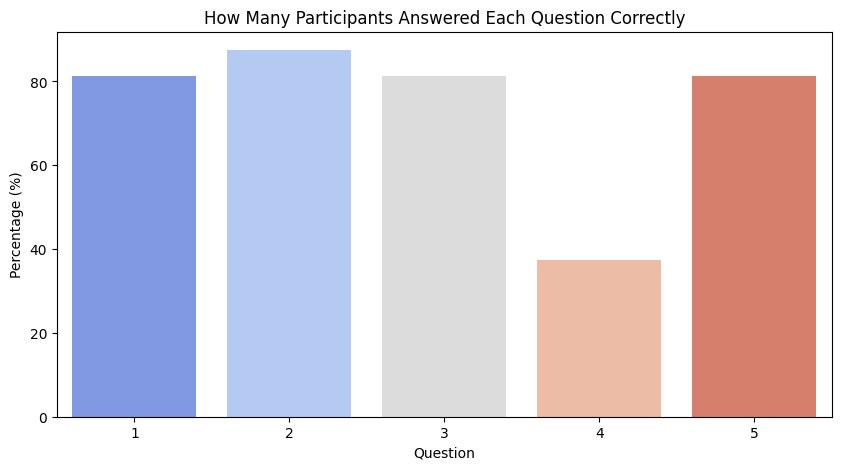

In [472]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correct_answers_percent.index, y=correct_answers_percent.values, hue=correct_answers_percent.index, legend=False, palette='coolwarm')
plt.title('How Many Participants Answered Each Question Correctly')
plt.xlabel('Question')
plt.ylabel('Percentage (%)')
plt.savefig(visualizations_dir / 'programming_test_correct_answers_per_question.png', dpi=1200, bbox_inches='tight')
plt.show()

## How many questions did each participant get correct?

In [222]:
programming_test_df.loc[:, 'total_correct'] = programming_test_df[[f'{col}_correct' for col in programming_test_correct_answers.keys()]].sum(axis=1)

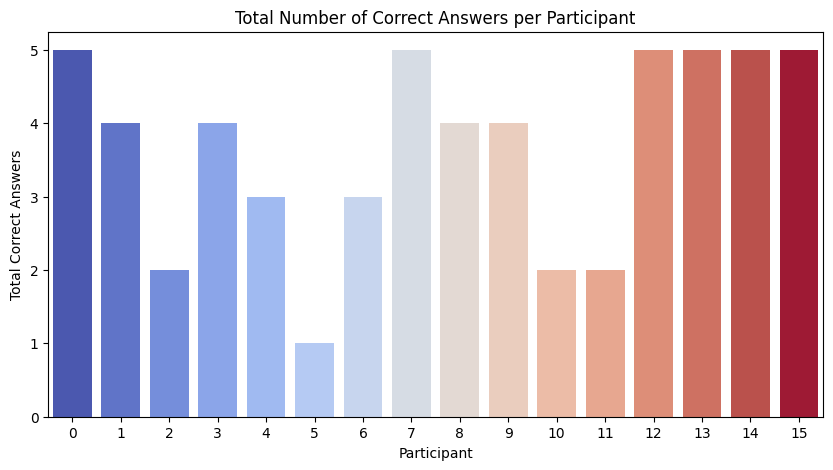

In [465]:
plt.figure(figsize=(10, 5))
sns.barplot(x=programming_test_df.index, y=programming_test_df['total_correct'], palette='coolwarm', hue=programming_test_df.index, legend=False)
plt.title('Total Number of Correct Answers per Participant')
plt.xlabel('Participant')
plt.ylabel('Total Correct Answers')
plt.savefig(visualizations_dir / 'programming_test_number_correct_answers_per_participant.png', dpi=1200)
plt.show()

## What percentage of questions got each participant correct?

In [225]:
programming_test_df.loc[:, 'total_correct_%'] = programming_test_df[[f'{col}_correct' for col in programming_test_correct_answers.keys()]].mean(axis=1) * 100

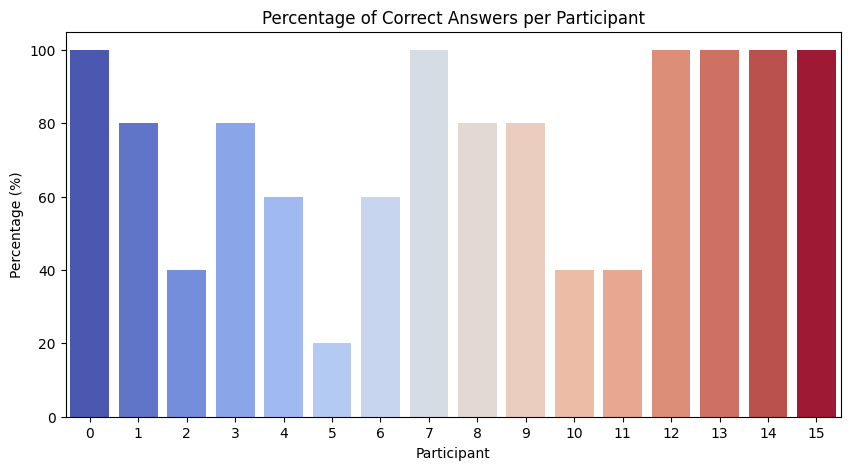

In [466]:
plt.figure(figsize=(10, 5))
sns.barplot(x=programming_test_df.index, y=programming_test_df['total_correct_%'], palette='coolwarm', hue=programming_test_df.index, legend=False)
plt.title('Percentage of Correct Answers per Participant')
plt.xlabel('Participant')
plt.ylabel('Percentage (%)')
plt.savefig(visualizations_dir / 'programming_test_percentage_correct_answers_per_participant.png', dpi=1200)
plt.show()

In [228]:
# Group the people into bad, good, and excellent based on their total_correct_% score
programming_test_df.loc[:, 'group'] = pd.cut(programming_test_df['total_correct_%'], bins=[0, 40, 80, 100], labels=['bad 0%-40%', 'good 41%-80%', 'excellent 81%-100%'])

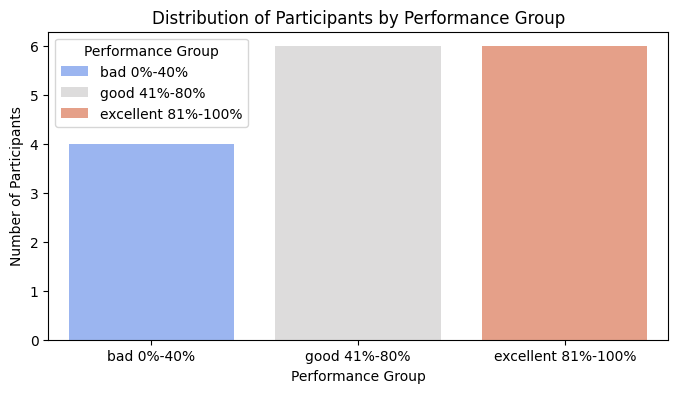

In [229]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='group', data=programming_test_df, palette='coolwarm', hue='group', legend=True)
ax.legend(title='Performance Group')
plt.title('Distribution of Participants by Performance Group')
plt.xlabel('Performance Group')
plt.ylabel('Number of Participants')
plt.savefig(visualizations_dir / 'programming_test_performance_group_distribution.png', dpi=1200, bbox_inches='tight')
plt.show()

# Usefulness of the GPT Bug Explanations

In [175]:
ratings_columns = [
    'On a scale of 1 to 5, how would you rate your explanation in the 1st scenario?',
    'Rate your confidence in your solution from 1 to 5.',
    "Rate the task's difficulty on a scale of 1 to 5.",
    'On a scale of 1 to 5, how would you rate your explanation in the 2nd scenario?',
    'Rate your confidence in your solution from 1 to 5..1',
    "Rate the task's difficulty on a scale of 1 to 5..1",
    'On a scale of 1 to 5, how would you rate your explanation in the 3rd scenario?',
    'Rate your confidence in your solution from 1 to 5..2',
    "Rate the task's difficulty on a scale of 1 to 5..2"
]
ratings_df = results_df[['nickname'] + ratings_columns]
new_column_names = [
    'nickname', 'Explanation Rating 1', 'Confidence in Solution 1', 'Task Difficulty 1',
    'Explanation Rating 2', 'Confidence in Solution 2', 'Task Difficulty 2',
    'Explanation Rating 3', 'Confidence in Solution 3', 'Task Difficulty 3'
]
column_mapping = dict(zip(['nickname'] + ratings_columns, new_column_names))
ratings_df = ratings_df.rename(columns=column_mapping)

In [177]:
ratings_df.describe()

,Explanation Rating 1,Confidence in Solution 1,Task Difficulty 1,Explanation Rating 2,Confidence in Solution 2,Task Difficulty 2,Explanation Rating 3,Confidence in Solution 3,Task Difficulty 3
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000
mean,2.562500,2.625000,4.000000,4.000000,4.312500,1.875000,2.50000,2.812500,3.812500
std,1.263263,1.360147,0.894427,1.316561,1.078193,1.087811,1.21106,1.276388,0.910586
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000
25%,1.750000,1.750000,3.750000,4.000000,4.000000,1.000000,1.75000,1.750000,3.000000
50%,2.500000,2.500000,4.000000,4.000000,5.000000,1.500000,2.00000,3.000000,4.000000
75%,3.250000,3.250000,5.000000,5.000000,5.000000,2.250000,4.00000,4.000000,4.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.00000,5.000000,5.000000


## Scenario 1

In [185]:
ratings_df_1 = ratings_df[['nickname']].join(ratings_df.filter(like='1'))

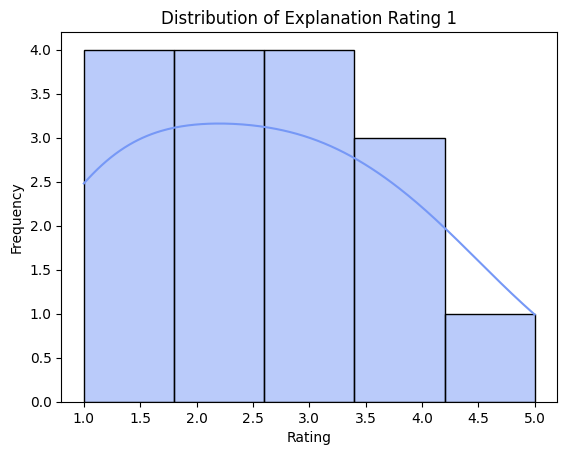

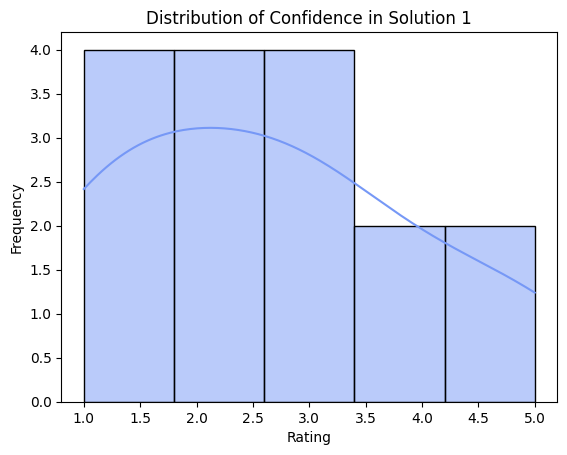

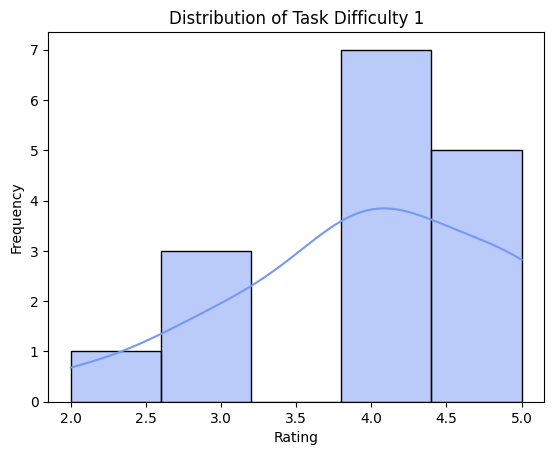

In [202]:
for column in ratings_df_1.columns[1:]:
    sns.histplot(ratings_df_1[column], kde=True, color='#7698F6')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.savefig(visualizations_dir / f'scenario_1_{column}_histogram.png', dpi=1200)
    plt.show()

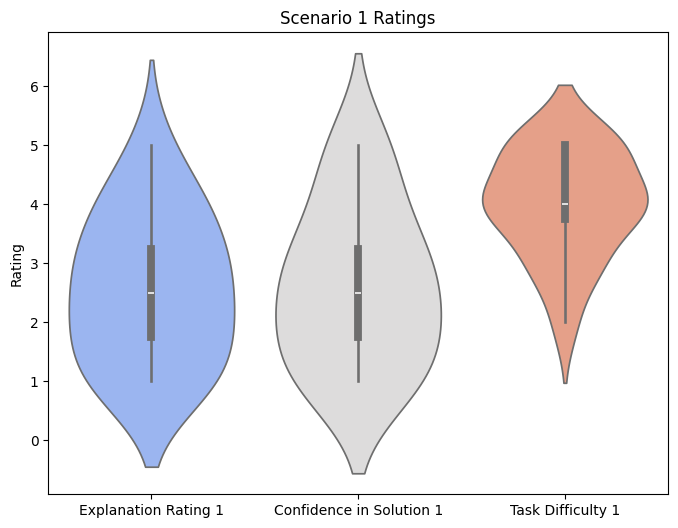

In [248]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=ratings_df_1.iloc[:, 1:], palette='coolwarm')
plt.title('Scenario 1 Ratings')
plt.ylabel('Rating')
plt.savefig(visualizations_dir / 'scenario_1_ratings_violinplot.png', dpi=1200)
plt.show()

### Correlation between Programming Test and Scenario 1 Ratings

In [230]:
programming_test_shortened_df = programming_test_df[['nickname', 'total_correct', 'total_correct_%', 'group']]

In [231]:
scenario_df_1 = programming_test_shortened_df.merge(ratings_df_1, on='nickname')

#### Ratings by Group

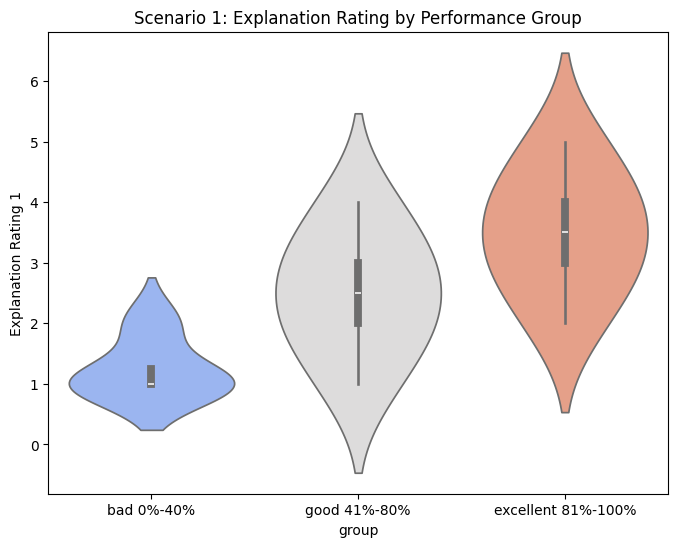

In [269]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_1, x='group', y='Explanation Rating 1', palette='coolwarm', hue='group')
plt.title('Scenario 1: Explanation Rating by Performance Group')
plt.savefig(visualizations_dir / 'scenario_1_explanation_rating_by_group.png', dpi=1200)
plt.show()

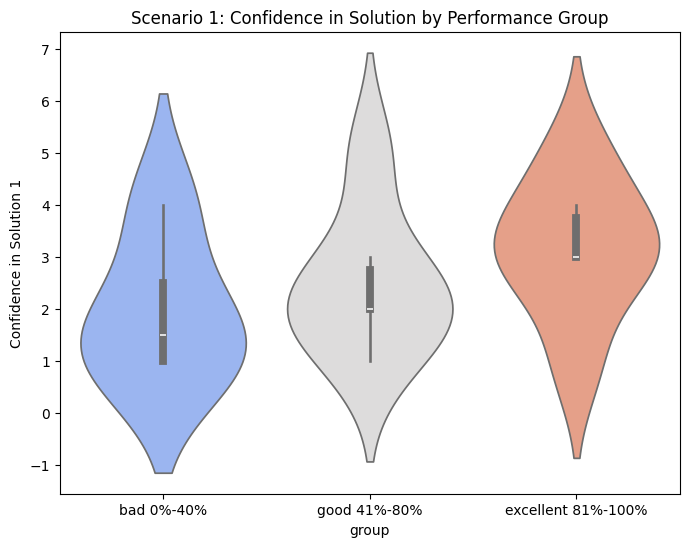

In [268]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_1, x='group', y='Confidence in Solution 1', palette='coolwarm', hue='group')
plt.title('Scenario 1: Confidence in Solution by Performance Group')
plt.savefig(visualizations_dir / 'scenario_1_confidence_in_solution_by_group.png', dpi=1200)
plt.show()

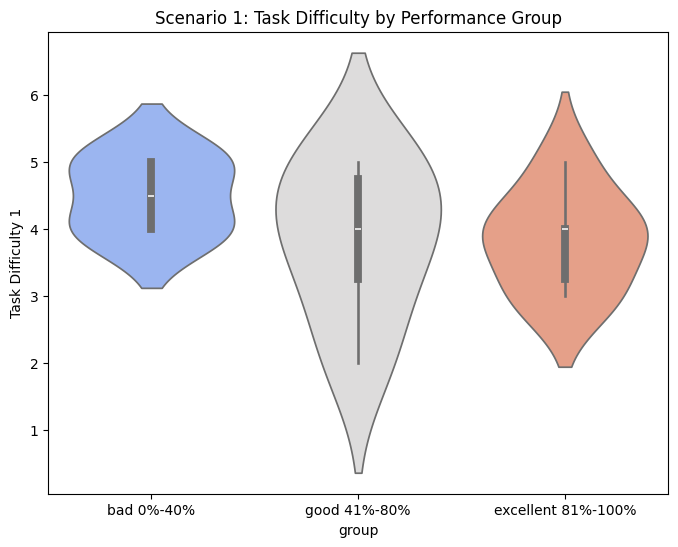

In [267]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_1, x='group', y='Task Difficulty 1', palette='coolwarm', hue='group')
plt.title('Scenario 1: Task Difficulty by Performance Group')
plt.savefig(visualizations_dir / 'scenario_1_task_difficulty_by_group.png', dpi=1200)
plt.show()

## Scenario 2

In [192]:
ratings_df_2 = ratings_df[['nickname']].join(ratings_df.filter(like='2'))

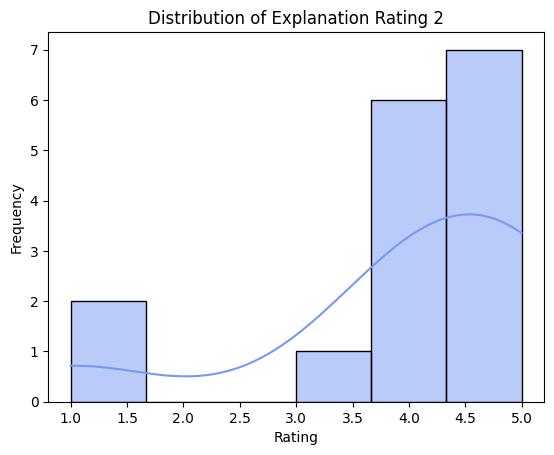

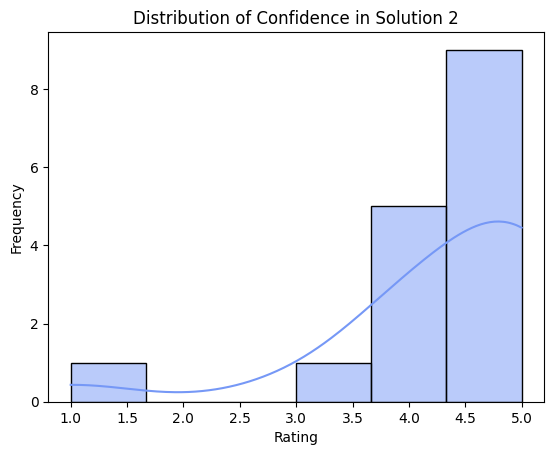

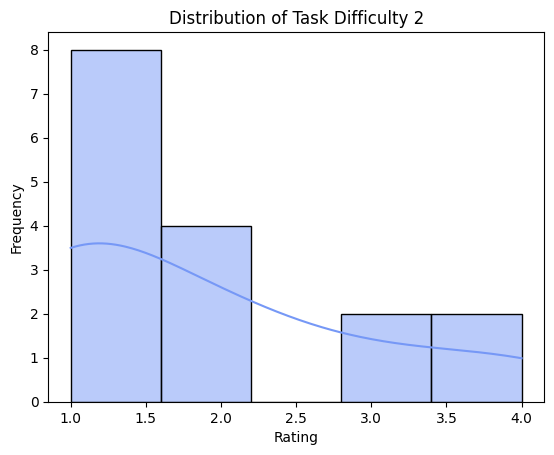

In [203]:
for column in ratings_df_2.columns[1:]:
    sns.histplot(ratings_df_2[column], kde=True, color='#7698F6')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.savefig(visualizations_dir / f'scenario_2_{column}_histogram.png', dpi=1200)
    plt.show()

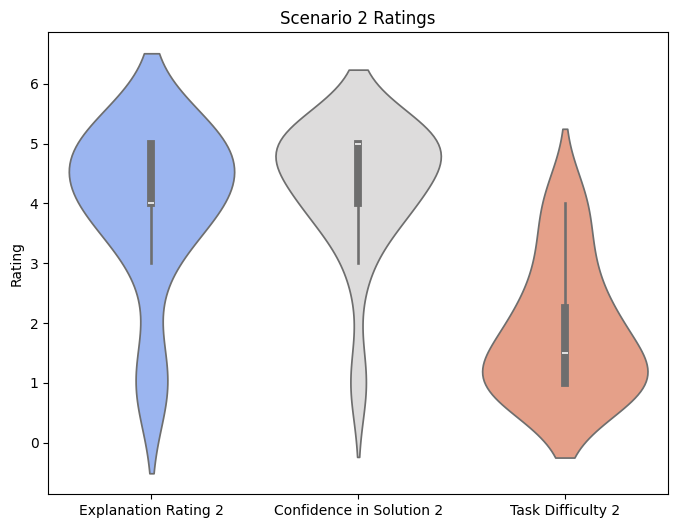

In [247]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=ratings_df_2.iloc[:, 1:], palette='coolwarm')
plt.title('Scenario 2 Ratings')
plt.ylabel('Rating')
plt.savefig(visualizations_dir / 'scenario_2_ratings_violinplot.png', dpi=1200)
plt.show()

### Correlation between Programming Test and Scenario 2 Ratings

In [252]:
scenario_df_2 = programming_test_shortened_df.merge(ratings_df_2, on='nickname')

#### Ratings by Group

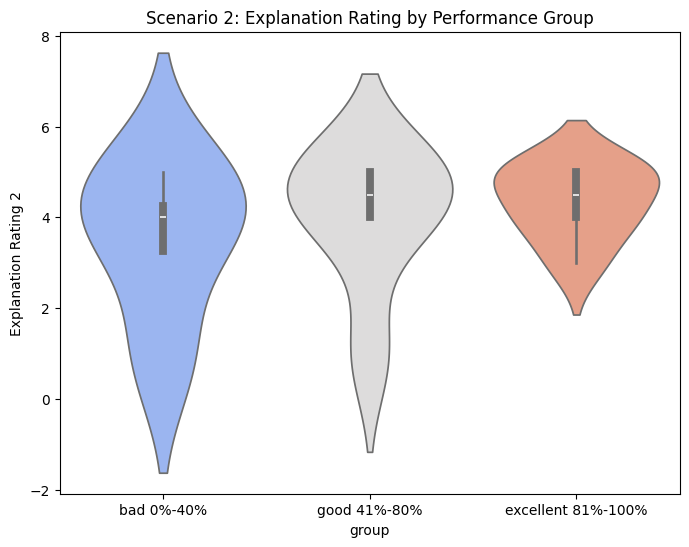

In [266]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_2, x='group', y='Explanation Rating 2', palette='coolwarm', hue='group')
plt.title('Scenario 2: Explanation Rating by Performance Group')
plt.savefig(visualizations_dir / 'scenario_2_explanation_rating_by_group.png', dpi=1200)
plt.show()

Text(0.5, 1.0, 'Scenario 2: Confidence in Solution by Performance Group')

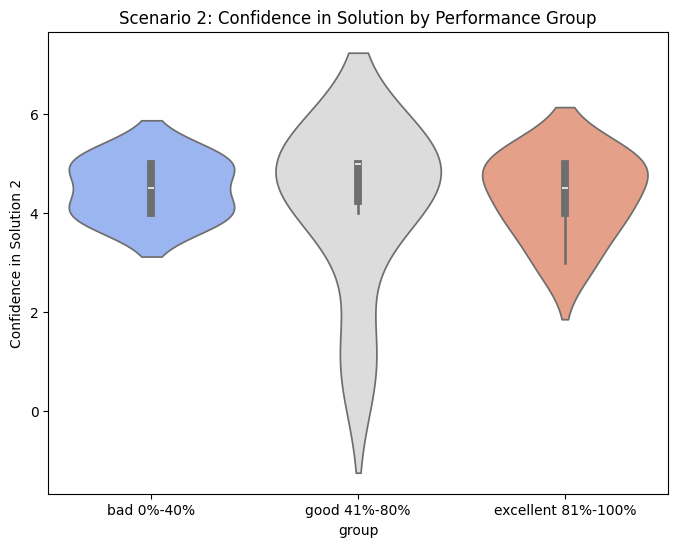

In [254]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_2, x='group', y='Confidence in Solution 2', palette='coolwarm', hue='group')
plt.savefig(visualizations_dir / 'scenario_2_confidence_in_solution_by_group.png', dpi=1200)
plt.title('Scenario 2: Confidence in Solution by Performance Group')

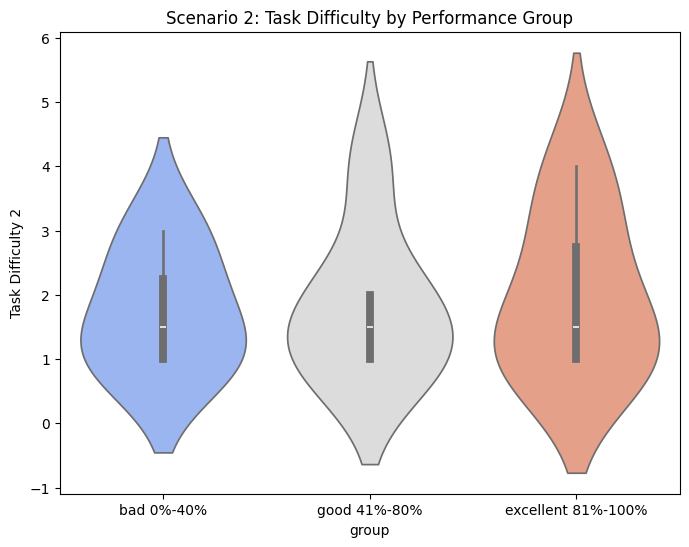

In [265]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_2, x='group', y='Task Difficulty 2', palette='coolwarm', hue='group')
plt.title('Scenario 2: Task Difficulty by Performance Group')
plt.savefig(visualizations_dir / 'scenario_2_task_difficulty_by_group.png', dpi=1200)
plt.show()

## Scenario 3

In [194]:
ratings_df_3 = ratings_df[['nickname']].join(ratings_df.filter(like='3'))

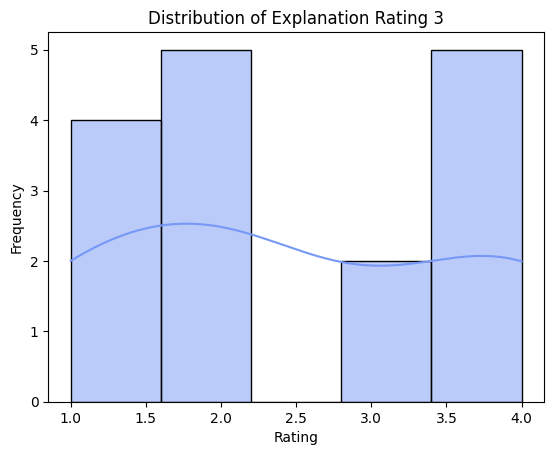

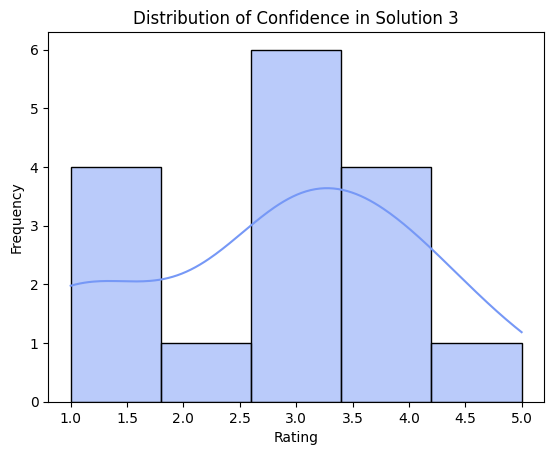

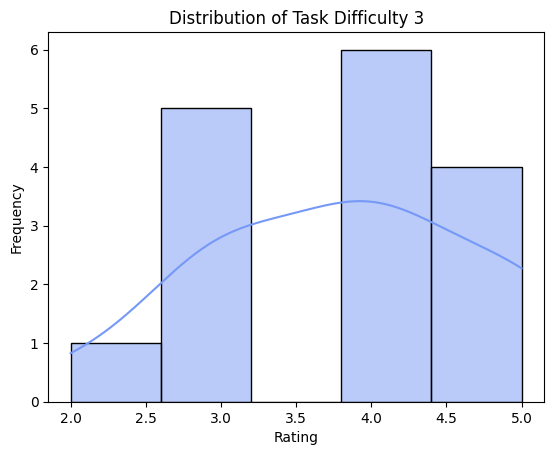

In [204]:
for column in ratings_df_3.columns[1:]:
    sns.histplot(ratings_df_3[column], kde=True, color='#7698F6')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.savefig(visualizations_dir / f'scenario_3_{column}_histogram.png', dpi=1200)
    plt.show()

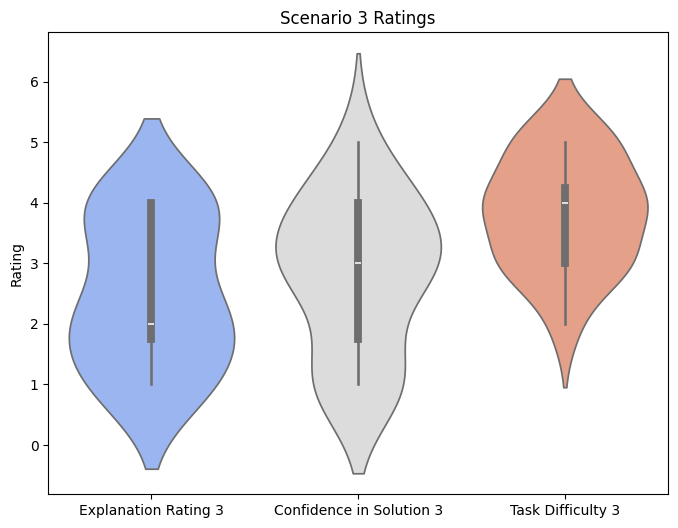

In [259]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=ratings_df_3.iloc[:, 1:], palette='coolwarm')
plt.title('Scenario 3 Ratings')
plt.ylabel('Rating')
plt.savefig(visualizations_dir / 'scenario_3_ratings_violinlot.png', dpi=1200)
plt.show()

### Correlation between Programming Test and Scenario 3 Ratings

In [260]:
scenario_df_3 = programming_test_shortened_df.merge(ratings_df_3, on='nickname')

#### Ratings by Group

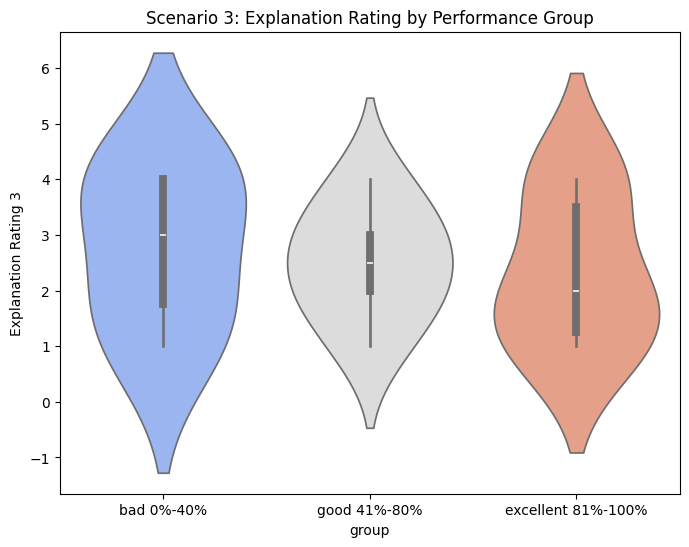

In [262]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_3, x='group', y='Explanation Rating 3', palette='coolwarm', hue='group')
plt.title('Scenario 3: Explanation Rating by Performance Group')
plt.savefig(visualizations_dir / 'scenario_3_explanation_rating_by_group.png', dpi=1200)
plt.show()

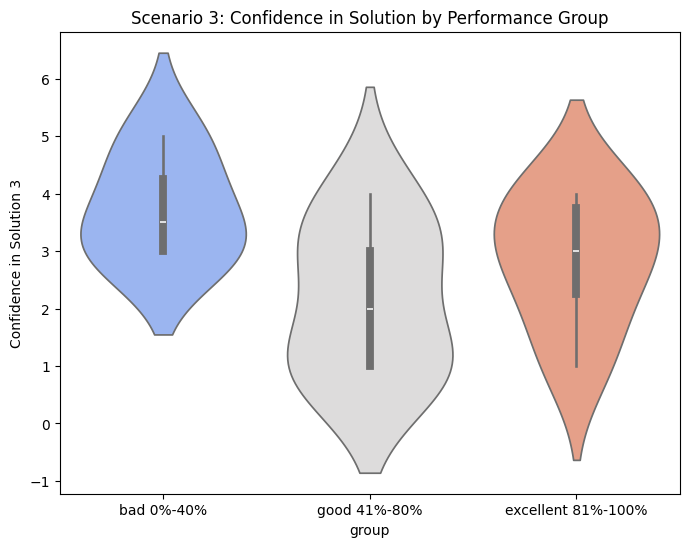

In [263]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_3, x='group', y='Confidence in Solution 3', palette='coolwarm', hue='group')
plt.title('Scenario 3: Confidence in Solution by Performance Group')
plt.savefig(visualizations_dir / 'scenario_3_confidence_in_solution_by_group.png', dpi=1200)
plt.show()

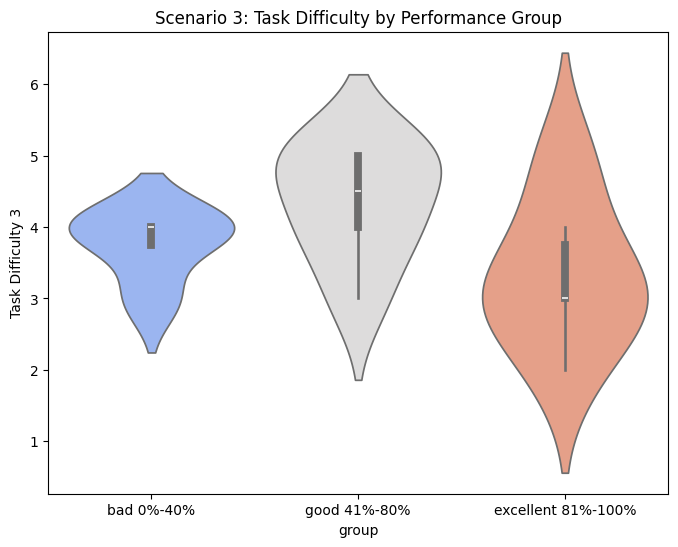

In [264]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=scenario_df_3, x='group', y='Task Difficulty 3', palette='coolwarm', hue='group')
plt.title('Scenario 3: Task Difficulty by Performance Group')
plt.savefig(visualizations_dir / 'scenario_3_task_difficulty_by_group.png', dpi=1200)
plt.show()

# Demographics

In [274]:
activities_list = [
    'Coding new systems',
    'Coding in legacy systems (maintenance, evolution, refactoring)',
    'Unit Tests',
    'Integration Tests',
    'User Acceptance Tests (creating and executing)',
    'Writing technical specifications (software architecture, design patterns, UML diagrams, etc.)',
    'Writing business specifications (use cases, usability requirements, etc.)',
    'Training and Testing machine learning models',
    'Data engineering, Data wrangling, MLOps configuration, Data migration, etc.'
]

In [284]:
def count_activities(df, activity_list):
    activity_counts = {activity: 0 for activity in activity_list}

    for activities in df['Which of these activities are part of your daily software engineering work?']:
        for activity in activity_list:
            if activity in activities:
                activity_counts[activity] += 1

    return activity_counts

In [303]:
activity_counts = count_activities(results_df, activities_list)
activities_df = pd.DataFrame(list(activity_counts.items()), columns=['activity', 'count'])
activities_df['percentage'] = (activities_df['count'] / len(results_df)) * 100

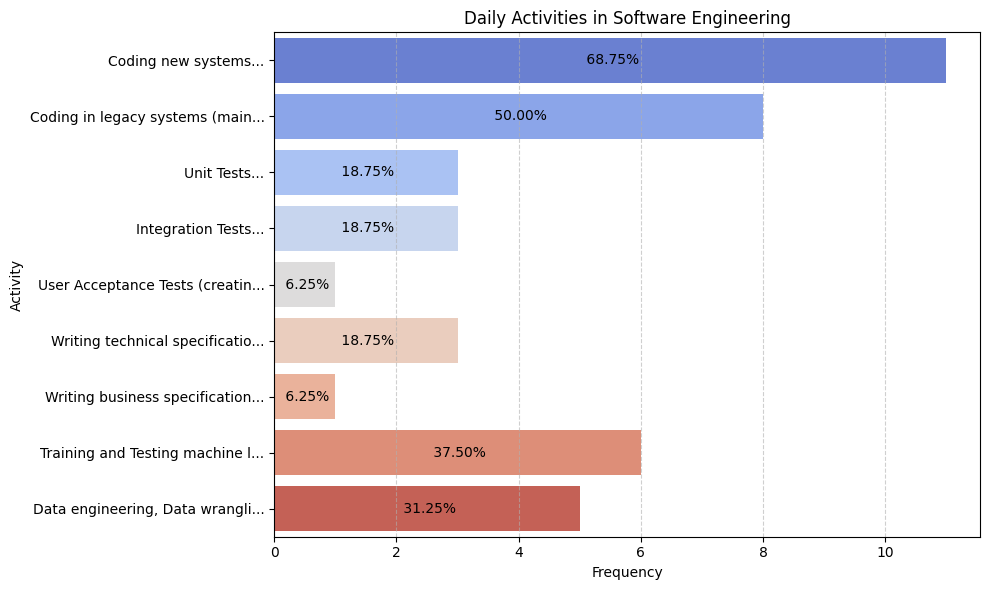

In [324]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='count', y=activities_df['activity'].str.slice(0, 30) + '...', data=activities_df, palette='coolwarm', hue='activity', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Activity')
plt.title('Daily Activities in Software Engineering')
plt.grid(axis='x', linestyle='--', alpha=0.6)
total = len(results_df)
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width - (width * 0.5),
             p.get_y() + p.get_height() / 2,
             ' {:1.2f}%'.format(width / total * 100),
             ha='center',
             va='center')
plt.tight_layout()
plt.savefig(visualizations_dir / 'daily_activities_in_software_engineering.png', dpi=1200)
plt.show()

In [ ]:
results_df['What is your current main professional activity?'] = results_df['What is your current main professional activity?'].str.replace('Student - Master program', 'Master Student')
results_df['What is your current main professional activity?'] = results_df['What is your current main professional activity?'].str.replace('Student - Bachelor program', 'Bachelor Student')
results_df['What is your current main professional activity?'] = results_df['What is your current main professional activity?'].str.replace('Professional - Software Engineer, Programmer, Developer', 'Professional ')

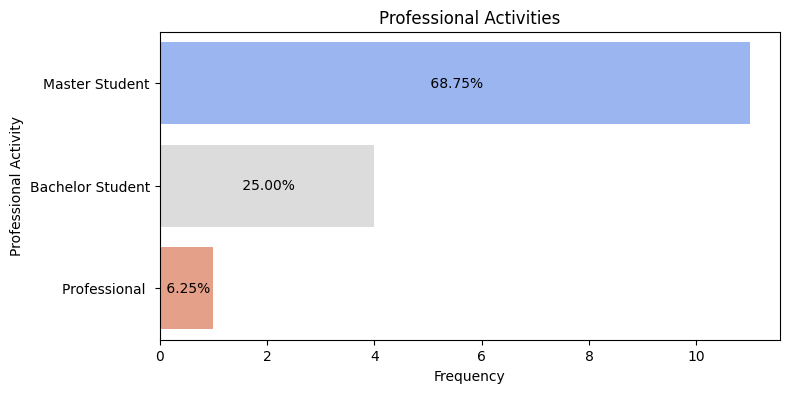

In [325]:
plt.figure(figsize=(8, 4))
results_df['What is your current main professional activity?'] = results_df['What is your current main professional activity?'].str.split('-').str[0]
ax = sns.countplot(y='What is your current main professional activity?', data=results_df, palette='coolwarm', hue='What is your current main professional activity?', legend=False)
plt.title('Professional Activities')
plt.xlabel('Frequency')
plt.ylabel('Professional Activity')
total = len(results_df)
for p in ax.patches:
    width = p.get_width()
    plt.text(width - (width * 0.5),
             p.get_y() + p.get_height() / 2,
             ' {:1.2f}%'.format(width / total * 100),
             ha='center',
             va='center')
plt.savefig(visualizations_dir / 'professional_activities.png', dpi=1200)
plt.show()

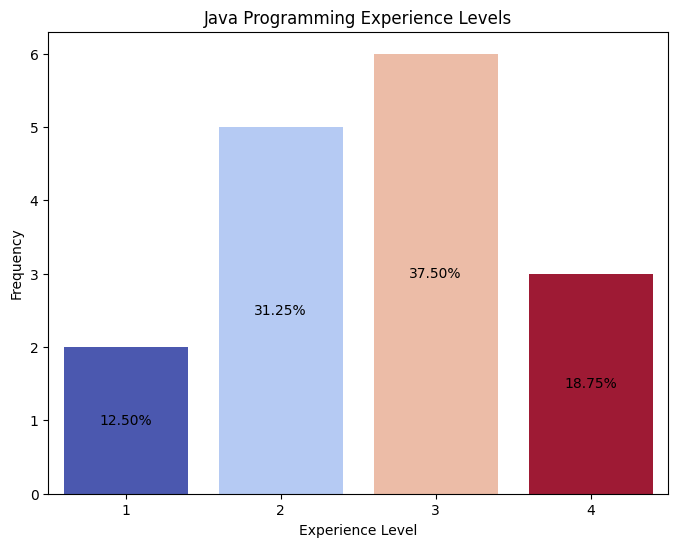

In [344]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='How experienced are you in the Java programming language?', data=results_df, palette='coolwarm', hue='How experienced are you in the Java programming language?', legend=False)
total = len(results_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='center', color='black')
ax.set_title('Java Programming Experience Levels')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Frequency')
plt.savefig(visualizations_dir / 'java_programming_experience_levels.png', dpi=1200)
plt.show()

In [345]:
experience_counts = results_df['Mark the years of experience in the languages below [Java]'].value_counts()
total = experience_counts.sum()
percentages = (experience_counts / total * 100).round(2)

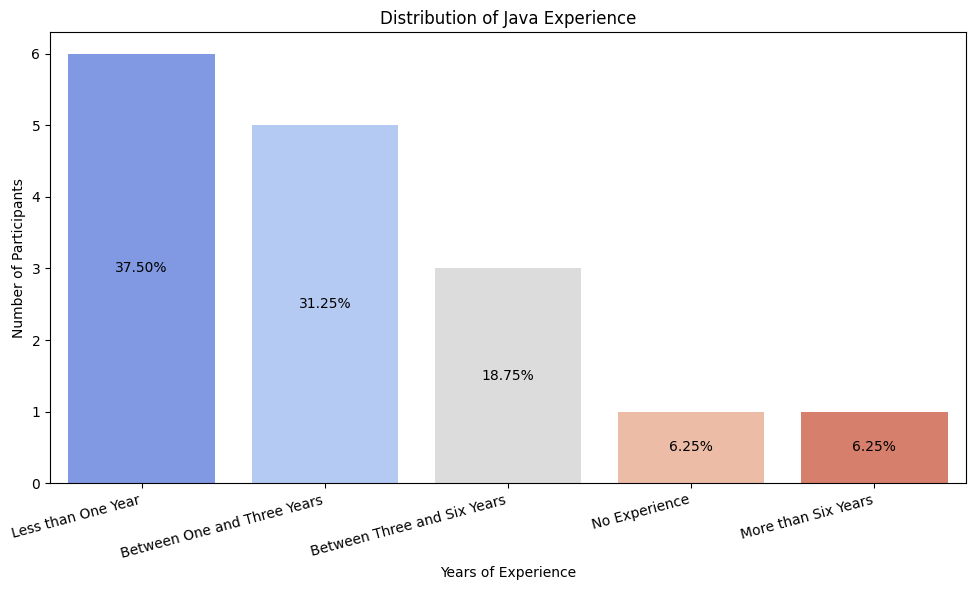

In [454]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='coolwarm', hue=experience_counts.index, legend=False)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='center', color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Participants')
plt.title('Distribution of Java Experience')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig(visualizations_dir / 'java_experience_distribution.png', dpi=1200)
plt.show()

In [348]:
frequency_counts = results_df['How frequently do you read or write source code?'].value_counts()
total = frequency_counts.sum()
percentages = (frequency_counts / total * 100).round(2)

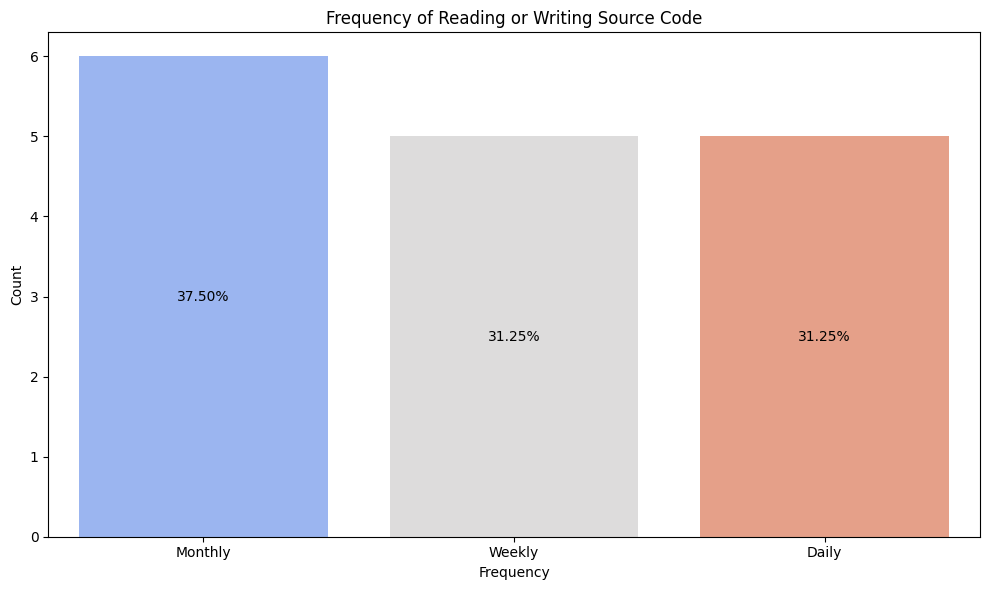

In [349]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette='coolwarm', hue=frequency_counts.index, legend=False)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='center', color='black')
plt.title('Frequency of Reading or Writing Source Code')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(visualizations_dir / 'source_code_frequency.png', dpi=1200)
plt.show()

In [352]:
frequency_counts = results_df['How frequently do you use version control tools (Git, GitHub, GitLab, SVN, etc.)?'].value_counts()
total = frequency_counts.sum()
percentages = (frequency_counts / total * 100).round(2)

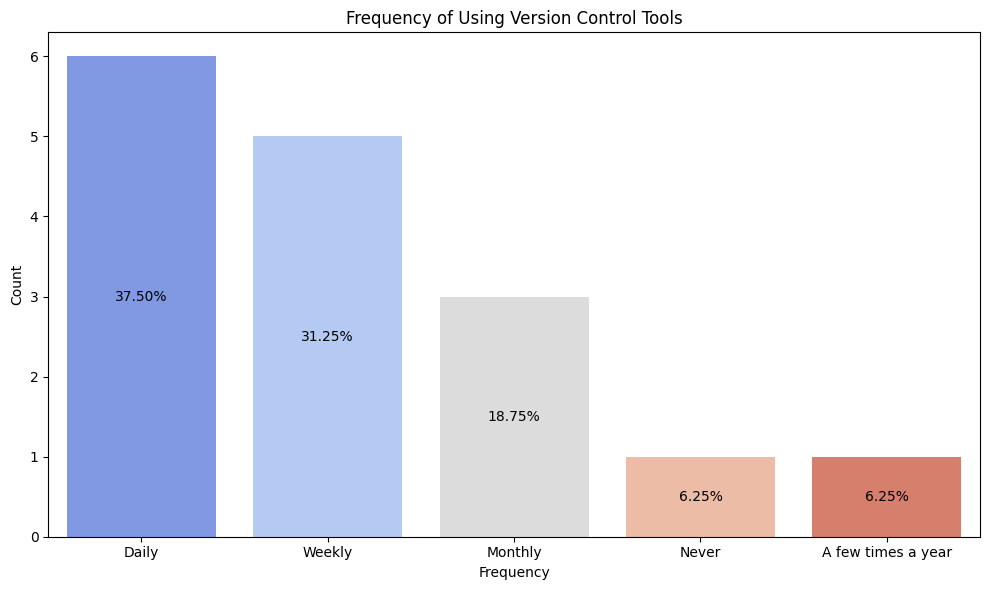

In [353]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette='coolwarm', hue=frequency_counts.index, legend=False)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='center', color='black')
plt.title('Frequency of Using Version Control Tools')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(visualizations_dir / 'version_control_frequency.png', dpi=1200)
plt.show()

In [361]:
results_df.rename(columns={'How satisfied are you with the current capabilities of ChatGPT for the following software engineering tasks?  [Improve exisiting code]': 'How satisfied are you with the current capabilities of ChatGPT for the following software engineering tasks?  [Improve existing code]'}, inplace=True)

In [370]:
tasks = [
    'Code summarization/explanation',
    'Generate code for a given requirement',
    'Find bugs in existing code',
    'Improve existing code',
    'Generate tests for existing code',
    'Improve technical specifications',
    'Improve business specifications'
]

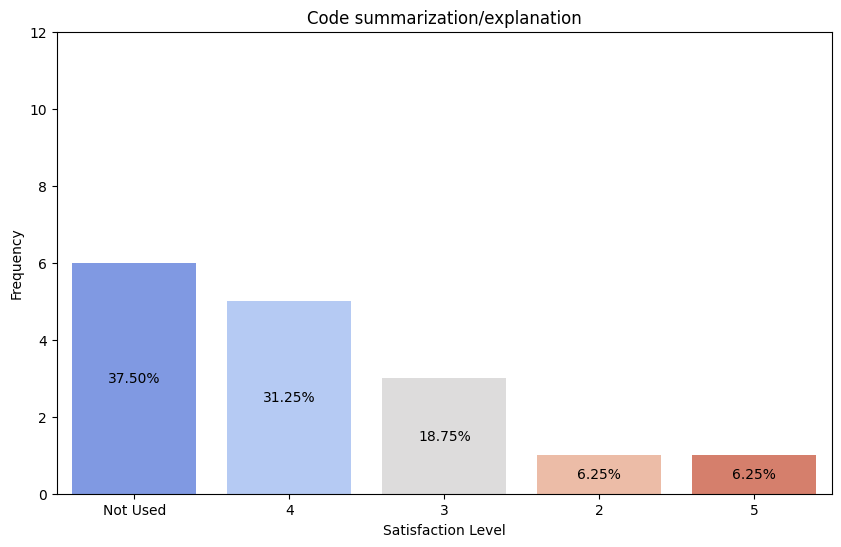

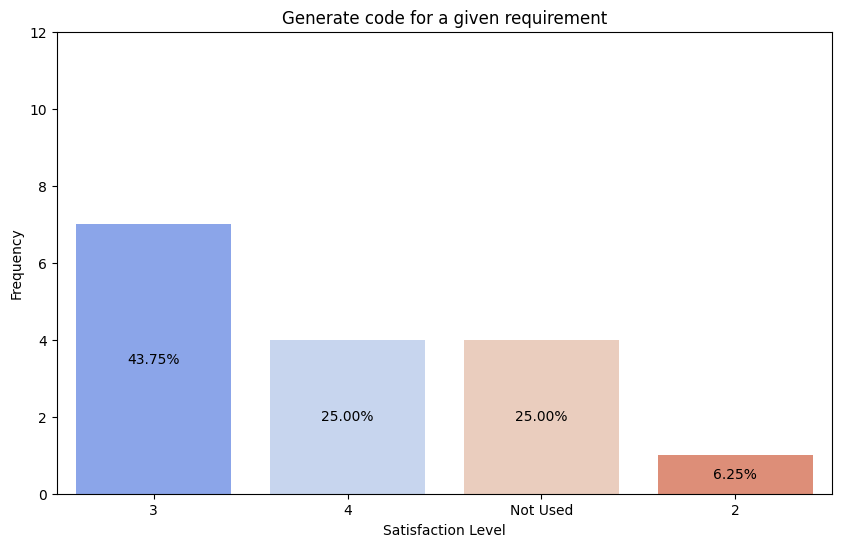

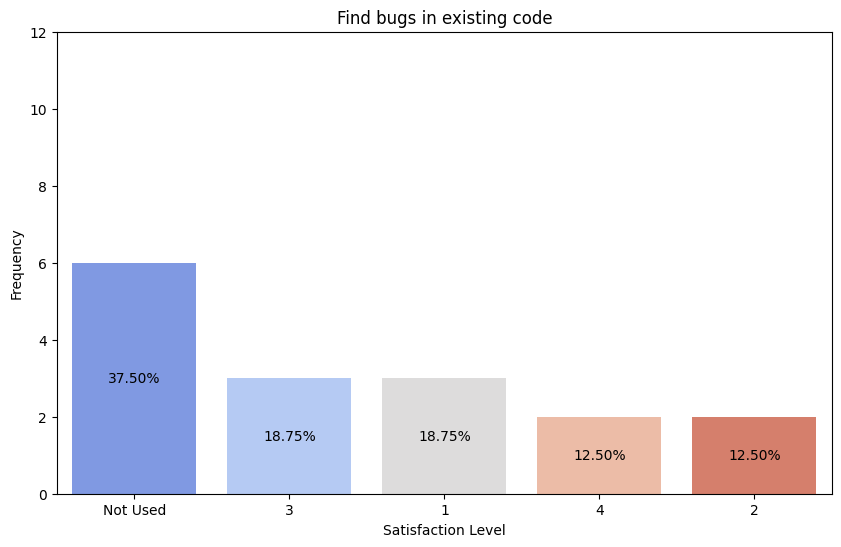

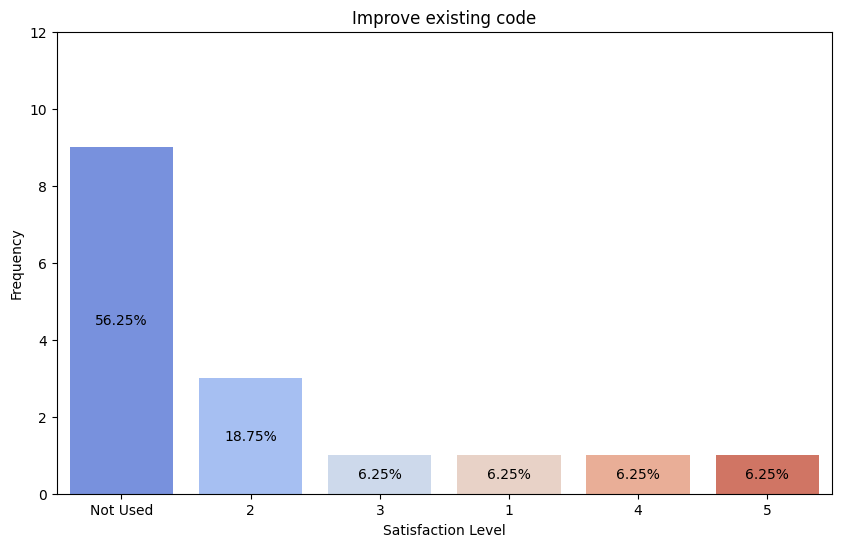

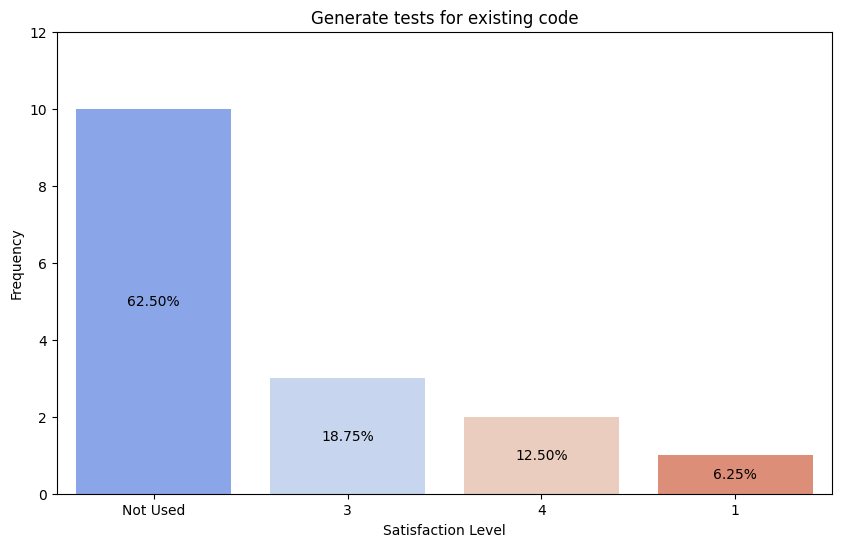

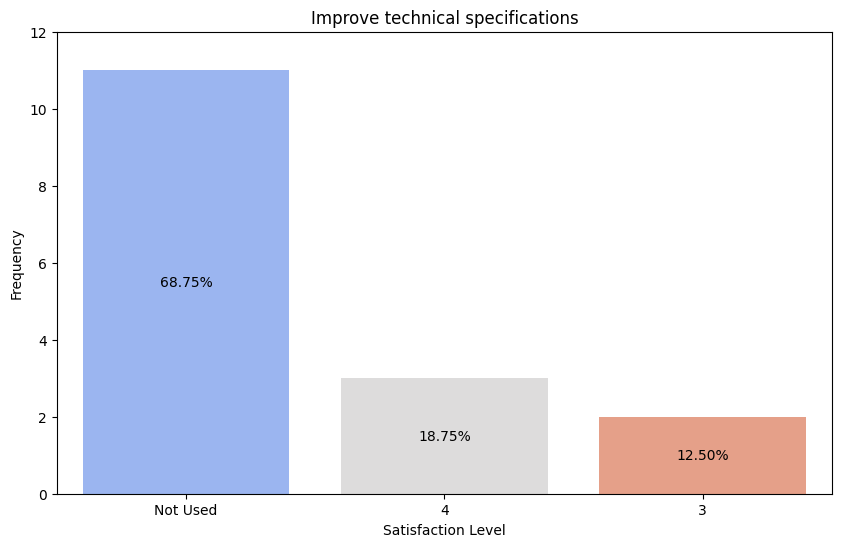

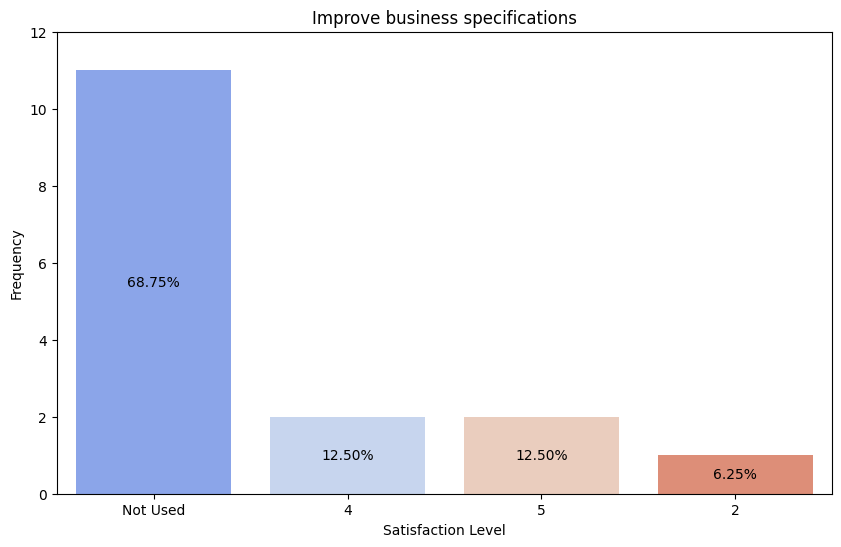

In [385]:
response_map = {
    "I don't use ChatGPT for that": "Not Used",
    "1 Unsatisfied": "1",
    "2": "2",
    "3": "3",
    "4": "4",
    "5. Very satisfied": "5"
}

satisfied_df = results_df.copy()
for task in tasks:
    satisfied_df.replace(response_map, inplace=True)
    response_counts = satisfied_df[f'How satisfied are you with the current capabilities of ChatGPT for the following software engineering tasks?  [{task}]'].value_counts()
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=response_counts.index, y=response_counts.values, palette='coolwarm', hue=response_counts.index, legend=False)
    plt.ylim(0, 12)
    total = response_counts.sum()
    
    for p in barplot.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = height / 2
        barplot.text(x, y, percentage, ha='center', va='center', color='black')        
    plt.title(f'{task}')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Frequency')
    task = task.replace(' ', '_').replace('/', '_')
    plt.savefig(visualizations_dir / f'gpt_satisfaction_{task}.png', dpi=1200)
    plt.show()

In [408]:
gpt_satisfaction_df = results_df[[f'How satisfied are you with the current capabilities of ChatGPT for the following software engineering tasks?  [{task}]' for task in tasks]].copy()
gpt_satisfaction_df.rename(columns={f'How satisfied are you with the current capabilities of ChatGPT for the following software engineering tasks?  [{task}]': task for task in tasks}, inplace=True)
gpt_satisfaction_df = gpt_satisfaction_df.melt(var_name='Task', value_name='Response')

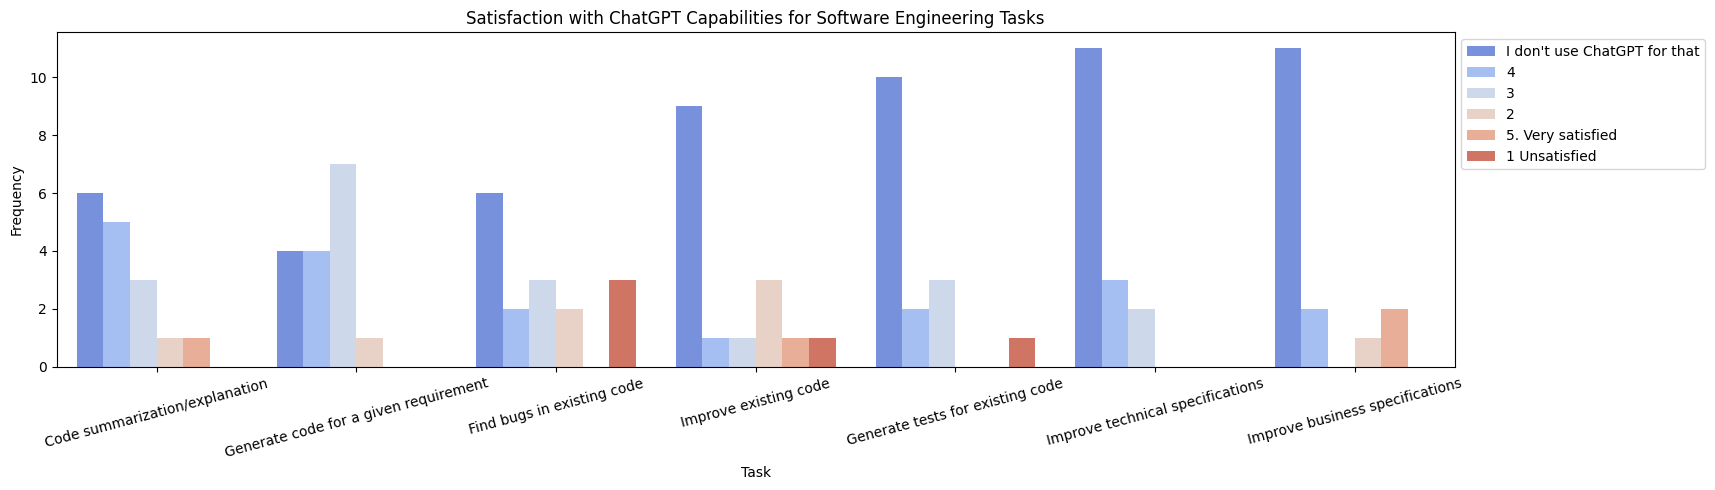

In [470]:
plt.figure(figsize=(15, 5))
sns.countplot(data=gpt_satisfaction_df, x='Task', hue='Response', palette='coolwarm')
plt.title('Satisfaction with ChatGPT Capabilities for Software Engineering Tasks')
plt.ylabel('Frequency')
plt.xticks(rotation=15)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(visualizations_dir / 'gpt_satisfaction_with_capabilities.png', dpi=1200, bbox_inches='tight')
plt.show()

In [388]:
coding_tools = [
    'GitHub CoPilot',
    'Codeium',
    'CodeGeex AI',
    'Code Whisperer',
    'Tabnine',
    'Blackbox'
]

In [395]:
coding_tools_df = results_df[[f'Please mark all the coding supporting tools that you use. [{tool}]' for tool in coding_tools]].copy()

In [396]:
coding_tools_df.rename(columns={f'Please mark all the coding supporting tools that you use. [{tool}]': tool for tool in coding_tools}, inplace=True)

In [404]:
coding_tools_df = coding_tools_df.melt(var_name='Tool', value_name='Response').copy()

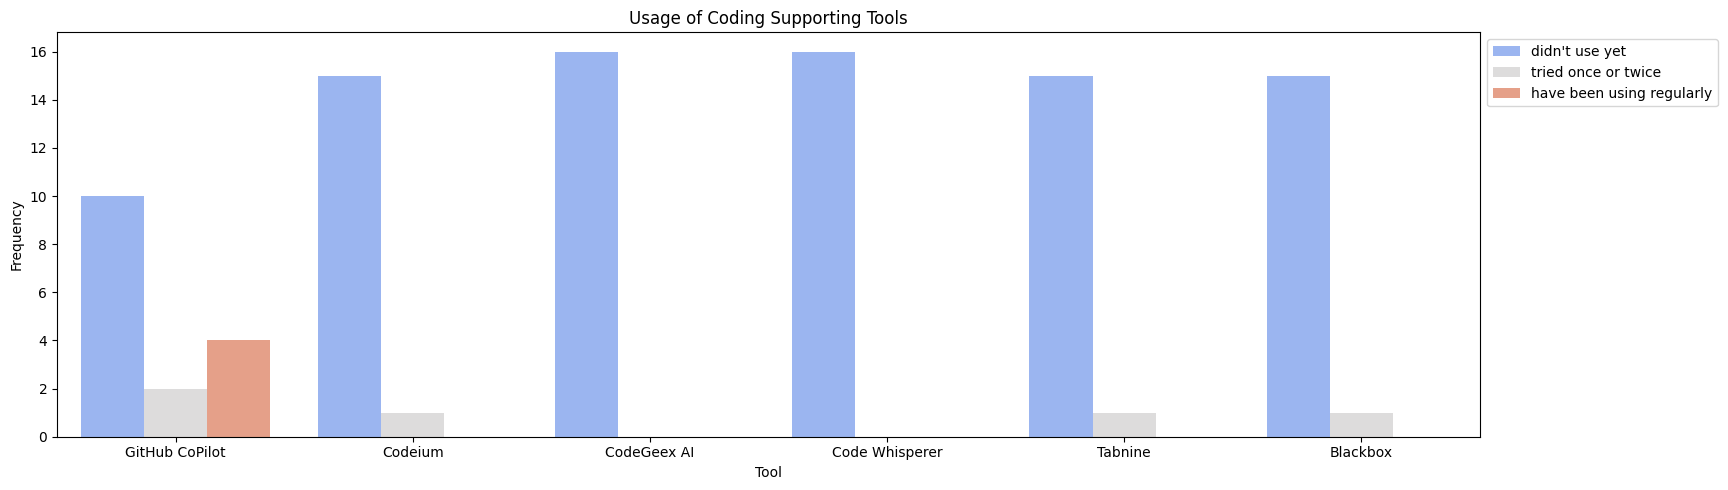

In [471]:
plt.figure(figsize=(15, 5))
sns.countplot(data=coding_tools_df, x='Tool', hue='Response', palette='coolwarm')
plt.title('Usage of Coding Supporting Tools')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(visualizations_dir / 'coding_supporting_tools_usage.png', dpi=1200, bbox_inches='tight')
plt.show()

In [446]:
count_words = pd.DataFrame()
count_words['word_count_1'] = results_df.iloc[:, 40].str.split().apply(len)
count_words['word_count_2'] = results_df.iloc[:, 41].str.split().apply(len)
count_words['word_count_3'] = results_df.iloc[:, 42].str.split().apply(len)

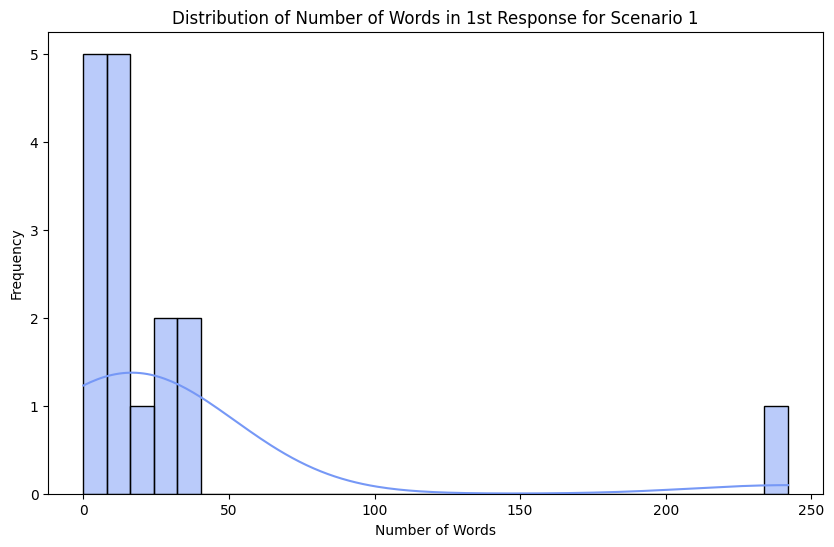

In [473]:
plt.figure(figsize=(10, 6))
sns.histplot(count_words['word_count_1'], bins=30, kde=True, color='#7698F6')
plt.title('Distribution of Number of Words in 1st Response for Scenario 1')
plt.xlabel('Number of Words') 
plt.ylabel('Frequency')
plt.savefig(visualizations_dir / 'scenario_1_response_1_word_count_distribution.png', dpi=1200)
plt.show()

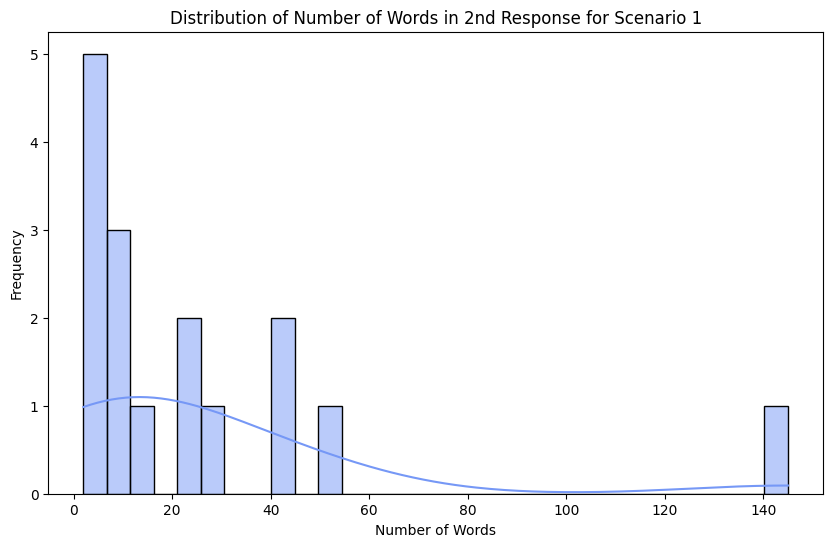

In [474]:
plt.figure(figsize=(10, 6))
sns.histplot(count_words['word_count_2'], bins=30, kde=True, color='#7698F6')
plt.title('Distribution of Number of Words in 2nd Response for Scenario 1')
plt.xlabel('Number of Words') 
plt.ylabel('Frequency')
plt.savefig(visualizations_dir / 'scenario_1_response_2_word_count_distribution.png', dpi=1200)
plt.show()

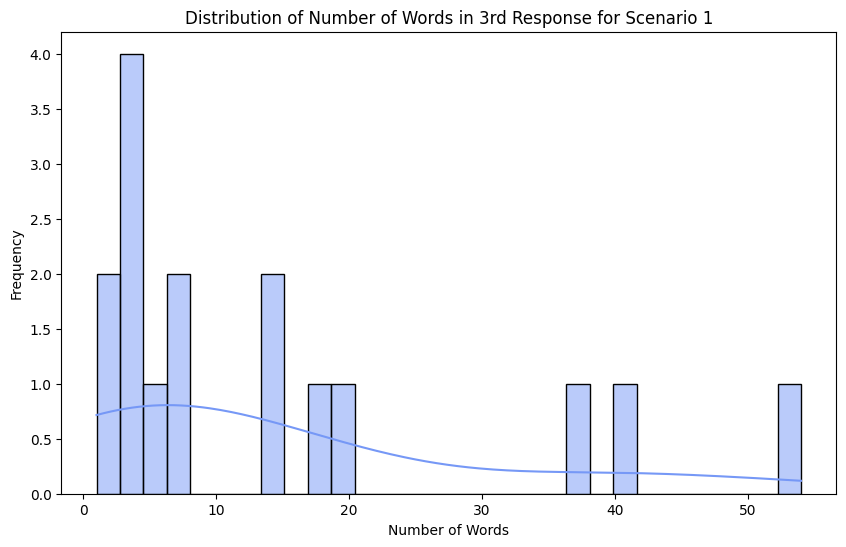

In [475]:
plt.figure(figsize=(10, 6))
sns.histplot(count_words['word_count_3'], bins=30, kde=True, color='#7698F6')
plt.title('Distribution of Number of Words in 3rd Response for Scenario 1')
plt.xlabel('Number of Words') 
plt.ylabel('Frequency')
plt.savefig(visualizations_dir / 'scenario_1_response_3_word_count_distribution.png', dpi=1200)
plt.show()

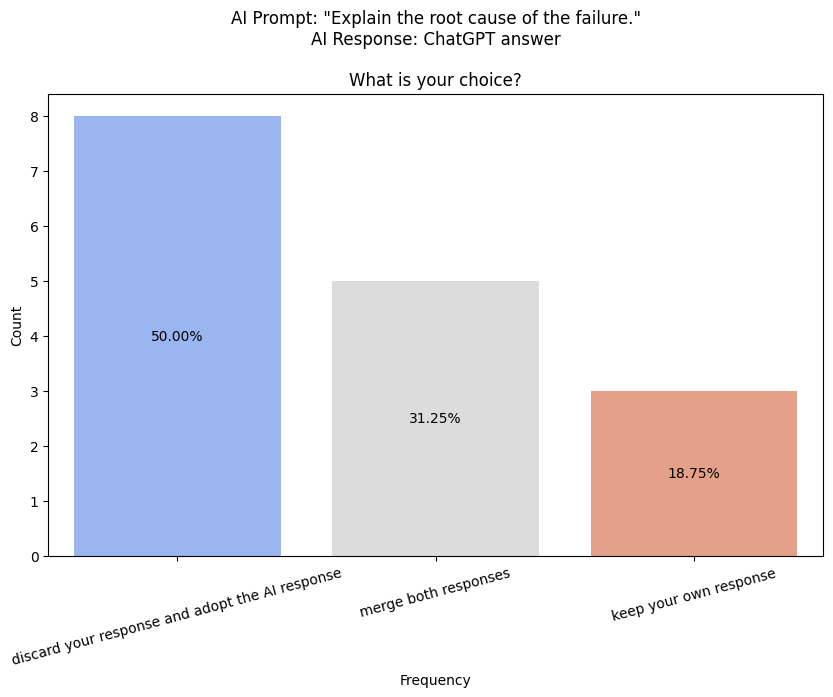

In [469]:
results_df['AI Prompt: "Explain the root cause of the failure."\nAI Response: ChatGPT answer\n\nWhat is your choice?'] = results_df['AI Prompt: "Explain the root cause of the failure."\nAI Response: ChatGPT answer\n\nWhat is your choice?'].str.replace(',', '')
frequency_counts = results_df['AI Prompt: "Explain the root cause of the failure."\nAI Response: ChatGPT answer\n\nWhat is your choice?'].value_counts()
total = frequency_counts.sum()
percentages = (frequency_counts / total * 100).round(2)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frequency_counts.index, y=frequency_counts.values, palette='coolwarm', hue=frequency_counts.index, legend=False)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='center', color='black')
plt.title('AI Prompt: "Explain the root cause of the failure."\nAI Response: ChatGPT answer\n\nWhat is your choice?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.savefig(visualizations_dir / 'ai_prompt_choice_distribution.png', dpi=1200, bbox_inches='tight')
plt.show()